## Stats and Public Health Deliverable 1 - Jashkirat Virdi

In [34]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Load the dataset
data = 'mosquito_data.csv'  # CSV is the same directory as the Notebook
df = pd.read_csv(data)

## Part 1 - Basic Data Wrangling

In [36]:
df.info #Provides a summary of the DataFrame

<bound method DataFrame.info of        Year  Week           Address Block  Block   Trap Trap type  \
0      2019    39   100XX W OHARE AIRPORT    100   T910    GRAVID   
1      2019    39       52XX S KOLMAR AVE     52   T114    GRAVID   
2      2019    39      58XX N WESTERN AVE     58   T028    GRAVID   
3      2019    39  39XX N SPRINGFIELD AVE     39   T228    GRAVID   
4      2019    39     131XX S BRANDON AVE    131   T209    GRAVID   
...     ...   ...                     ...    ...    ...       ...   
18490  2016    36           3XX W 18TH ST      3   T043    GRAVID   
18491  2007    34    46XX N MILWAUKEE AVE     46   T003    GRAVID   
18492  2016    30        127XX S DOTY AVE    127   T115    GRAVID   
18493  2017    33      20XX N DOMINICK ST     20  T240B  SENTINEL   
18494  2015    33   100XX W OHARE AIRPORT    100   T902    GRAVID   

                      Date  Mosquito number Mosquito ID WNV Present  \
0      2019-09-26 00:09:00                2         Res    negative 

In [4]:
df.head() #Displays the first five rows of the DataFrame for a quick overview of the data. 

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [5]:
#Convert 'Date' Column to Datetime Format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Explore numeric and categorical column distributions
print(df['Mosquito number'].describe())

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64


**Mosquito number:** The count of mosquitoes ranges from 1 to 50, with a mean of approximately 10.88. This indicates that the data includes a wide range of mosquito counts per trap.

In [7]:
print(df['Block'].describe())

count    18495.000000
mean        54.314788
std         36.712796
min          1.000000
25%         22.000000
50%         51.000000
75%         89.000000
max        132.000000
Name: Block, dtype: float64


**Block:** The block numbers range from 1 to 132, showing a wide geographical spread of traps within the city.

In [8]:
print(df['Trap'].value_counts().head())  # Top 5 traps

Trap
T002    406
T114    340
T031    333
T008    326
T138    304
Name: count, dtype: int64


**Trap:** The five most common traps are T002 (406 occurrences), T114 (340), T031 (333), T008 (326), and T138 (304).

In [9]:
print(df['WNV Present'].value_counts())

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64


**WNV Present:** Out of the samples, 14,501 tested negative for West Nile Virus, while 3,994 tested positive.

In [10]:
# Dropping the 'Address Block' column because Block and Address Block Contains the same Data just without detailed location
df_reduced = df.drop(columns=['Address Block'])

In [11]:
# Display the first few rows of the modified data frame
print(df_reduced.head())

   Year  Week  Block  Trap Trap type                Date  Mosquito number  \
0  2019    39    100  T910    GRAVID 2019-09-26 00:09:00                2   
1  2019    39     52  T114    GRAVID 2019-09-26 00:09:00                1   
2  2019    39     58  T028    GRAVID 2019-09-26 00:09:00                2   
3  2019    39     39  T228    GRAVID 2019-09-26 00:09:00                1   
4  2019    39    131  T209    GRAVID 2019-09-26 00:09:00                9   

  Mosquito ID WNV Present         Species        Lat        Lon  
0         Res    negative  CULEX RESTUANS        NaN        NaN  
1         Res    negative  CULEX RESTUANS  41.798211 -87.736925  
2         Res    negative  CULEX RESTUANS  41.987245 -87.689417  
3         Res    negative  CULEX RESTUANS  41.953664 -87.724987  
4         Res    negative  CULEX RESTUANS  41.657069 -87.546049  


In [12]:
# Check for duplicate information across columns
print(df.nunique())

Year                 13
Week                 21
Address Block       154
Block                87
Trap                190
Trap type             4
Date                298
Mosquito number      50
Mosquito ID           4
WNV Present           2
Species               4
Lat                2500
Lon                2500
dtype: int64


In [13]:
# Check for null values
print(df.isnull().sum())

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64


In [14]:
# To remove rows with null values in 'Lat' and 'Lon' columns, we can use dropna():
df_cleaned = df.dropna(subset=['Lat', 'Lon'])

In [15]:
# Verify the removal by checking for null values again
null_values_after_removal = df_cleaned.isnull().sum()

In [16]:
# Display the result to confirm that 'Lat' and 'Lon' no longer have null values
null_values_after_removal

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

## Part 2 - Basic EDA: Relationship between mosquito number and date

In [17]:
# Aggregate mosquito numbers by date
df_date_agg = df.groupby(df['Date'].dt.date)['Mosquito number'].sum().reset_index()
df_date_agg['Date'] = pd.to_datetime(df_date_agg['Date'])

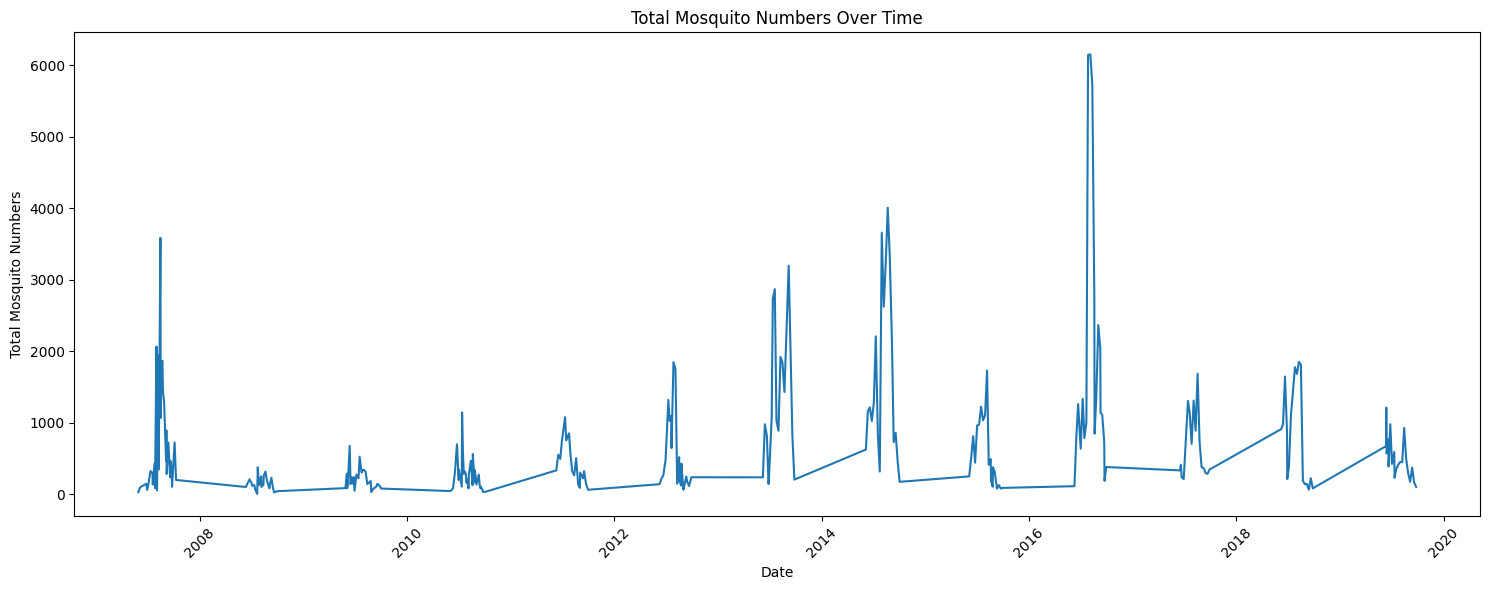

In [18]:
# Line plot for mosquito numbers over time
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_date_agg, x='Date', y='Mosquito number')
plt.title('Total Mosquito Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Mosquito Numbers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Mosquito Numbers Over Time :**
<br>The above line graph showcases the cumulative count of mosquitoes trapped across the span from 2008 to 2019. 
<br>This depiction aids in discerning the cyclical trends and annual shifts within mosquito populations.
<br>Noticeably, the quantity of mosquitoes exhibits fluctuations throughout the years, likely reaching its zenith in the warmer seasons. 
<br>This pattern aligns with the known behavior of mosquitoes, whose activity levels are swayed by climatic and meteorological factors.

## Part 3 - Advanced EDA

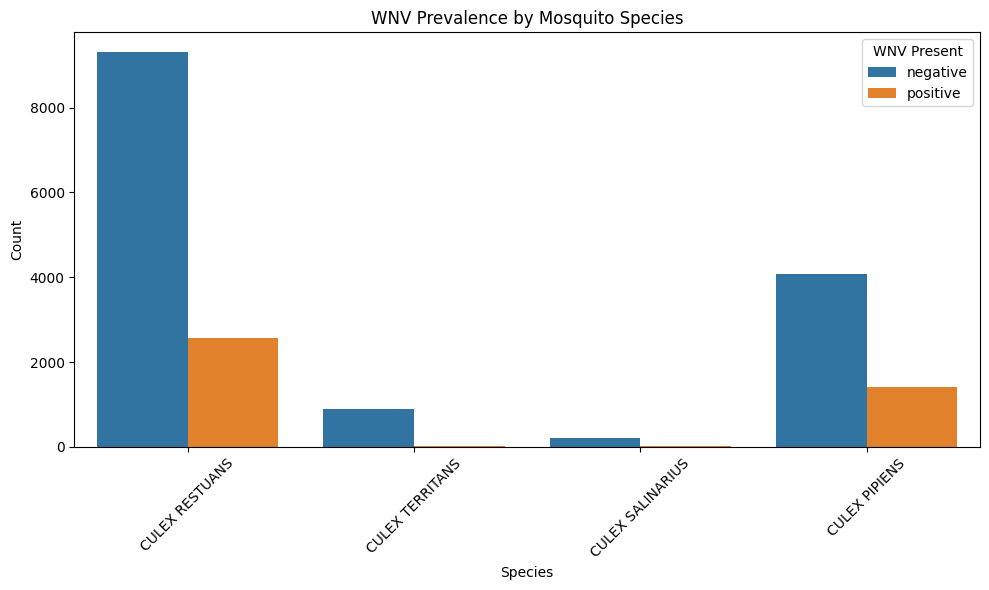

In [19]:
# 1. WNV Prevalence by Mosquito Species
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Species', hue='WNV Present')
plt.title('WNV Prevalence by Mosquito Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='WNV Present', loc='upper right')
plt.tight_layout()
plt.show()

**Mosquito Species and Their Link to West Nile Virus Prevalence:**
<br>The illustrated count plot delineates the role of various mosquito species in the spread of the West Nile Virus (WNV). 
<br>It becomes apparent that certain species have a higher propensity for harboring and transmitting the virus, underscoring the species-dependent risks associated with WNV dissemination.

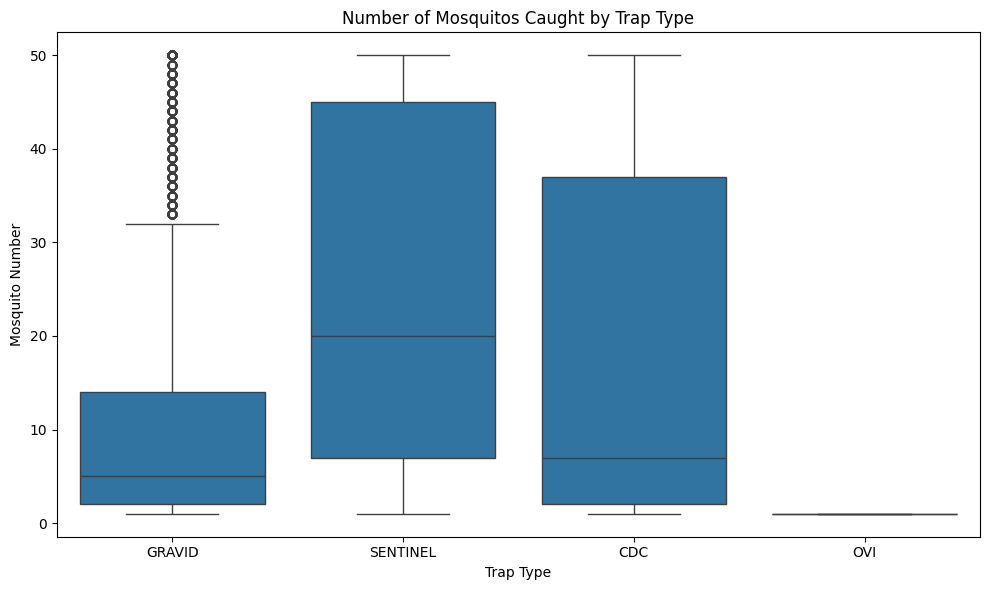

In [20]:
# 2. Number of Mosquitos Caught by Trap Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Trap type', y='Mosquito number')
plt.title('Number of Mosquitos Caught by Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Mosquito Number')
plt.tight_layout()
plt.show()

**Impact of Trap Type on Mosquito Capture Rates**
<br>Through the depicted box plot, we observe a discernible variation in the effectiveness of different types of mosquito traps. 
<br>This variation implies that mosquitoes might exhibit preferences for certain trap types over others, thereby affecting the overall efficiency of mosquito capture across different trap designs.

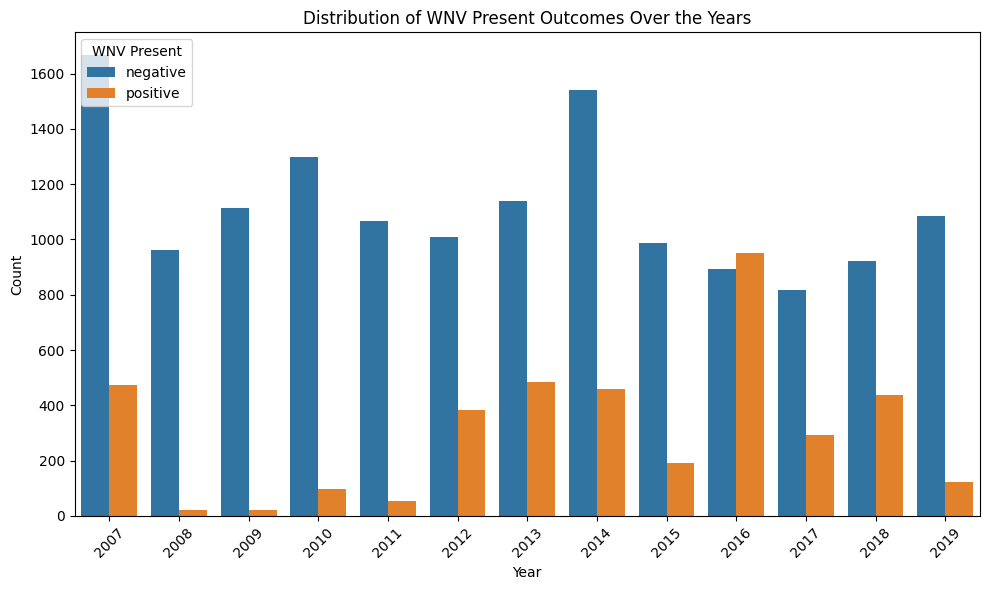

In [21]:
# Additional insight: Distribution of WNV Present outcomes over the years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='WNV Present')
plt.title('Distribution of WNV Present Outcomes Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='WNV Present', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Yearly Trends in West Nile Virus Detection:**
<br>The count plot provided offers an insight into the annual patterns of WNV test results, charting the ebb and flow of the virus's detection rates over time. 
<br>Notably, it draws attention to the oscillations in the number of positive detections year over year, a dynamic potentially shaped by an amalgam of factors such as climatic variations, fluctuations in mosquito population densities, and the effectiveness of implemented public health measures.